In [1]:
%load_ext autoreload
%autoreload 2
import ziff.ziff 

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.DEBUG, datefmt='%I:%M:%S')

logger = logging.getLogger()
logger.setLevel(logging.INFO)
logging.info("test")

02:46:18 INFO:test


In [3]:
#img = '/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c08_o_q3_sciimg.fits'
img = '/Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits'

In [17]:
ls

CCD_maps.ipynb            Results_2019_03_01.ipynb  devel_collection.ipynb
Moon.ipynb                devel.ipynb               test.npz
PLOT_SHAPES.ipynb         devel_CCD.ipynb


Loading default catalogs


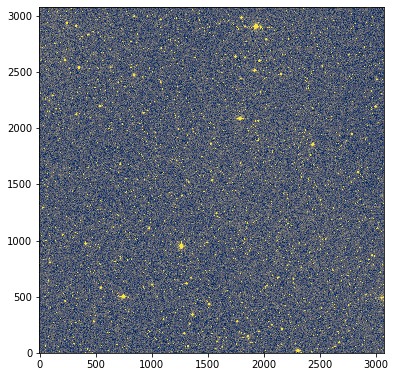

In [19]:
z = ziff.ziff.Ziff(img,logger=logger,build_default_cat = False, load_default_cat = True)
_ = z.get_ztfimg()[0].show()
fig = _.get_figure()
fig.savefig('../examples/figures/sciimg.png')

In [14]:
z.config

{'i/o': {'image_hdu': 0,
  'noise': 1.0,
  'ra': 'TELRA',
  'dec': 'TELDEC',
  'cat_hdu': 1,
  'x_col': 'xpos',
  'y_col': 'ypos',
  'sky_col': 'sky',
  'gain': 'GAIN',
  'satur': 'SATURATE',
  'nstars': 200,
  'stamp_size': 15,
  'image_file_name': ['/Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits']},
 'psf': {'model': {'type': 'PixelGrid',
   'interp': 'Lanczos(5)',
   'scale': 1.012,
   'size': 15,
   'start_sigma': 2.0,
   'centered': 0},
  'interp': {'type': 'BasisPolynomial', 'order': 2},
  'outliers': {'include_reserve': 0,
   'max_remove': 5,
   'nsigma': 3,
   'type': 'Chisq'}}}

In [27]:
z.set_config_value('i/o,nstars',300)
z.set_config_value('psf,interp,order',3)
z.set_config_value('psf,outliers,max_remove',20)

In [28]:
z.run_piff('gaia_calibration',overwrite_cat=True)

03:07:07 WARNING:Using custom wcs from config for /Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits
03:07:08 WARNING:Using custom wcs from config for /Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits
03:07:08 WARNING:Iteration 1: Fitting 300 stars
03:07:14 INFO:Beginning solution of matrix size (2250, 2250)
03:07:14 INFO:Ill-conditioned matrix (rcond=3.13255e-33): result may not be accurate.
03:07:15 WARNING:             Total chisq = 28967.64 / 66930 dof
03:07:15 WARNING:Iteration 2: Fitting 300 stars
03:07:21 INFO:Beginning solution of matrix size (2250, 2250)
03:07:21 INFO:Ill-conditioned matrix (rcond=3.1853e-33): result may not be accurate.
03:07:22 INFO:Found 11 stars with chisq > thresh
03:07:22 INFO:             Removed 11 outliers
03:07:22 WARNING:             Total chisq = 11279.63 / 64474 dof
03:07:22 WARNING:Iteration 3: Fitting 289 stars
03:07:27 INFO:Beginning solution of matrix size (2250, 2250)
03:07:27 INFO:Ill-conditioned matr

In [29]:
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=True)
new_stars = z.reflux_stars(stars,fit_center=False, use_minuit=False)
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)


03:07:57 WARNING:Using custom wcs from config for /Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits
03:07:57 WARNING:Reading image file /Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits
03:07:57 WARNING:Reading star catalog /Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_gaia_full.fits.
03:07:57 INFO:Processing catalog 0 with 2035 stars
03:08:00 WARNING:Read a total of 2035 stars from 1 image
03:08:00 WARNING:Using custom wcs from config for /Users/graziani/temp/ztf_20190917468333_000698_zi_c03_o_q2_sciimg.fits


Processing 1/2035
Processing 2/2035
Processing 3/2035
Processing 4/2035
Processing 5/2035
Processing 6/2035
Processing 7/2035
Processing 8/2035
Processing 9/2035
Processing 10/2035
Processing 11/2035
Processing 12/2035
Processing 13/2035
Processing 14/2035
Processing 15/2035
Processing 16/2035
Processing 17/2035
Processing 18/2035
Processing 19/2035
Processing 20/2035
Processing 21/2035
Processing 22/2035
Processing 23/2035
Processing 24/2035
Processing 25/2035
Processing 26/2035
Processing 27/2035
Processing 28/2035
Processing 29/2035
Processing 30/2035
Processing 31/2035
Processing 32/2035
Processing 33/2035
Processing 34/2035
Processing 35/2035
Processing 36/2035
Processing 37/2035
Processing 38/2035
Processing 39/2035
Processing 40/2035
Processing 41/2035
Processing 42/2035
Processing 43/2035
Processing 44/2035
Processing 45/2035
Processing 46/2035
Processing 47/2035
Processing 48/2035
Processing 49/2035
Processing 50/2035
Processing 51/2035
Processing 52/2035
Processing 53/2035
Pr

Processing 443/2035
Processing 444/2035
Processing 445/2035
Processing 446/2035
Processing 447/2035
Processing 448/2035
Processing 449/2035
Processing 450/2035
Processing 451/2035
Processing 452/2035
Processing 453/2035
Processing 454/2035
Processing 455/2035
Processing 456/2035
Processing 457/2035
Processing 458/2035
Processing 459/2035
Processing 460/2035
Processing 461/2035
Processing 462/2035
Processing 463/2035
Processing 464/2035
Processing 465/2035
Processing 466/2035
Processing 467/2035
Processing 468/2035
Processing 469/2035
Processing 470/2035
Processing 471/2035
Processing 472/2035
Processing 473/2035
Processing 474/2035
Processing 475/2035
Processing 476/2035
Processing 477/2035
Processing 478/2035
Processing 479/2035
Processing 480/2035
Processing 481/2035
Processing 482/2035
Processing 483/2035
Processing 484/2035
Processing 485/2035
Processing 486/2035
Processing 487/2035
Processing 488/2035
Processing 489/2035
Processing 490/2035
Processing 491/2035
Processing 492/2035


Processing 896/2035
Processing 897/2035
Processing 898/2035
Processing 899/2035
Processing 900/2035
Processing 901/2035
Processing 902/2035
Processing 903/2035
Processing 904/2035
Processing 905/2035
Processing 906/2035
Processing 907/2035
Processing 908/2035
Processing 909/2035
Processing 910/2035
Processing 911/2035
Processing 912/2035
Processing 913/2035
Processing 914/2035
Processing 915/2035
Processing 916/2035
Processing 917/2035
Processing 918/2035
Processing 919/2035
Processing 920/2035
Processing 921/2035
Processing 922/2035
Processing 923/2035
Processing 924/2035
Processing 925/2035
Processing 926/2035
Processing 927/2035
Processing 928/2035
Processing 929/2035
Processing 930/2035
Processing 931/2035
Processing 932/2035
Processing 933/2035
Processing 934/2035
Processing 935/2035
Processing 936/2035
Processing 937/2035
Processing 938/2035
Processing 939/2035
Processing 940/2035
Processing 941/2035
Processing 942/2035
Processing 943/2035
Processing 944/2035
Processing 945/2035


Processing 1336/2035
Processing 1337/2035
Processing 1338/2035
Processing 1339/2035
Processing 1340/2035
Processing 1341/2035
Processing 1342/2035
Processing 1343/2035
Processing 1344/2035
Processing 1345/2035
Processing 1346/2035
Processing 1347/2035
Processing 1348/2035
Processing 1349/2035
Processing 1350/2035
Processing 1351/2035
Processing 1352/2035
Processing 1353/2035
Processing 1354/2035
Processing 1355/2035
Processing 1356/2035
Processing 1357/2035
Processing 1358/2035
Processing 1359/2035
Processing 1360/2035
Processing 1361/2035
Processing 1362/2035
Processing 1363/2035
Processing 1364/2035
Processing 1365/2035
Processing 1366/2035
Processing 1367/2035
Processing 1368/2035
Processing 1369/2035
Processing 1370/2035
Processing 1371/2035
Processing 1372/2035
Processing 1373/2035
Processing 1374/2035
Processing 1375/2035
Processing 1376/2035
Processing 1377/2035
Processing 1378/2035
Processing 1379/2035
Processing 1380/2035
Processing 1381/2035
Processing 1382/2035
Processing 13

Processing 1736/2035
Processing 1737/2035
Processing 1738/2035
Processing 1739/2035
Processing 1740/2035
Processing 1741/2035
Processing 1742/2035
Processing 1743/2035
Processing 1744/2035
Processing 1745/2035
Processing 1746/2035
Processing 1747/2035
Processing 1748/2035
Processing 1749/2035
Processing 1750/2035
Processing 1751/2035
Processing 1752/2035
Processing 1753/2035
Processing 1754/2035
Processing 1755/2035
Processing 1756/2035
Processing 1757/2035
Processing 1758/2035
Processing 1759/2035
Processing 1760/2035
Processing 1761/2035
Processing 1762/2035
Processing 1763/2035
Processing 1764/2035
Processing 1765/2035
Processing 1766/2035
Processing 1767/2035
Processing 1768/2035
Processing 1769/2035
Processing 1770/2035
Processing 1771/2035
Processing 1772/2035
Processing 1773/2035
Processing 1774/2035
Processing 1775/2035
Processing 1776/2035
Processing 1777/2035
Processing 1778/2035
Processing 1779/2035
Processing 1780/2035
Processing 1781/2035
Processing 1782/2035
Processing 17

<IPython.core.display.Javascript object>


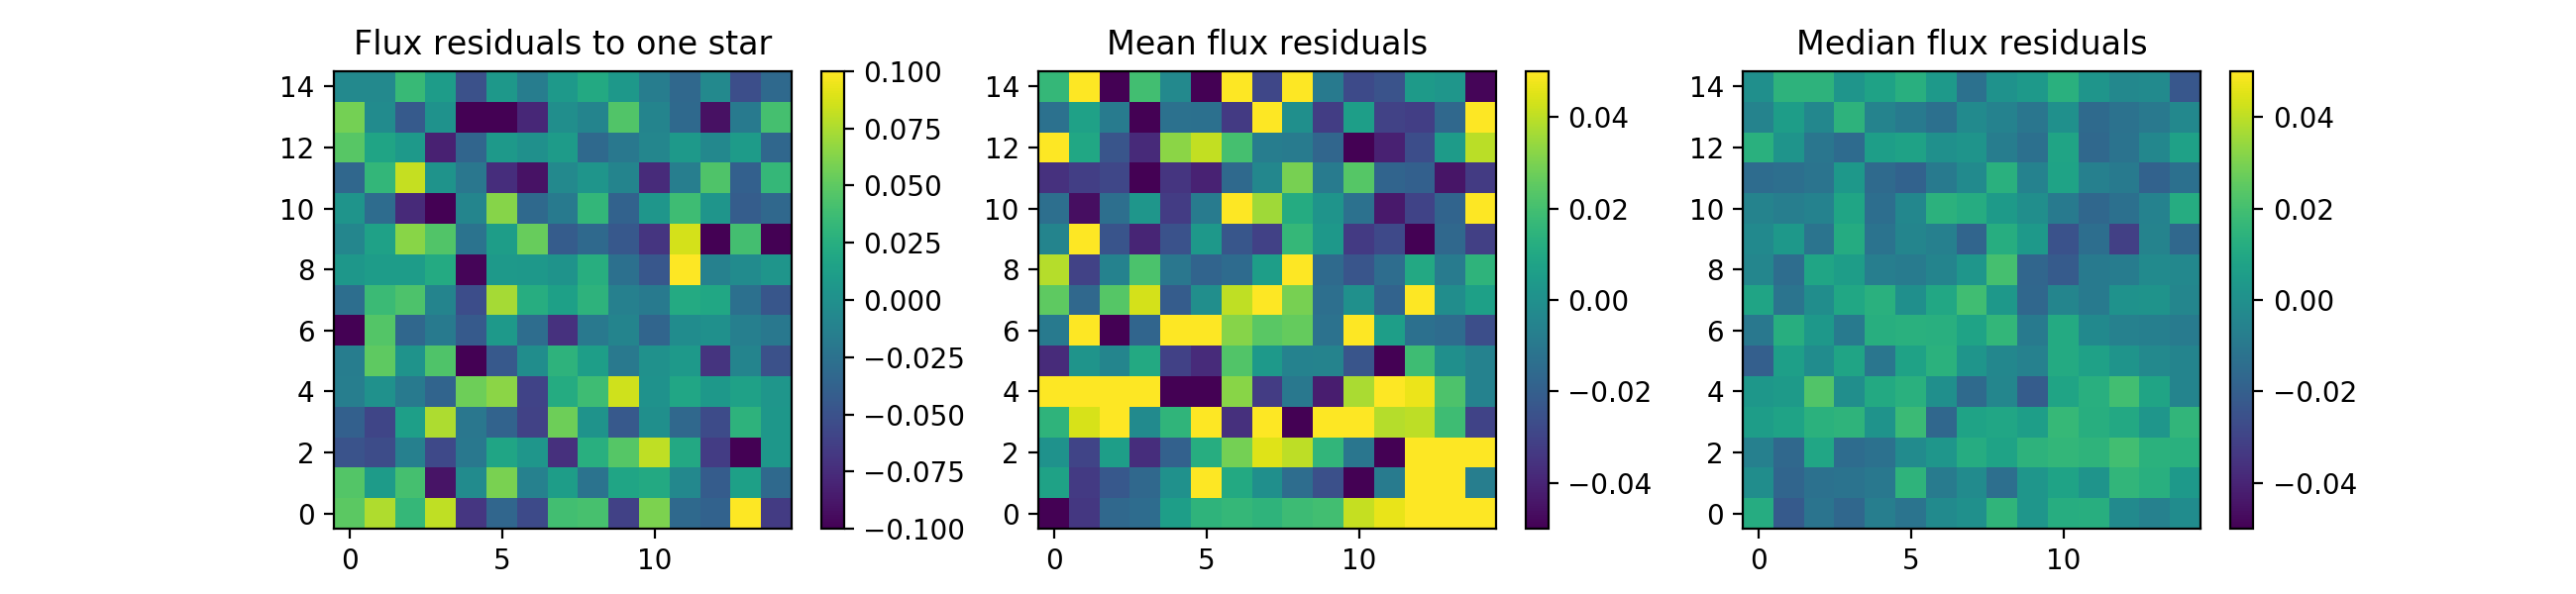

In [38]:
import numpy as np
import matplotlib.pyplot as P
fig, axes = P.subplots(1,3,figsize=(13,3))
im_kwargs  = {'origin':'lower', 'vmin' : -0.1, 'vmax': 0.1}
i = axes[0].imshow(res[0].T, **im_kwargs)
fig.colorbar(i,ax=axes[0])
axes[0].set_title('Flux residuals to one star')
im_kwargs  = {'origin':'lower', 'vmin' : -0.05, 'vmax': 0.05}
axes[1].set_title('Mean flux residuals')
i = axes[1].imshow(np.mean(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[1])

axes[2].set_title('Median flux residuals')
i = axes[2].imshow(np.median(res,axis=0).T, **im_kwargs)
fig.colorbar(i,ax=axes[2])
fig.savefig('../examples/figures/residuals.png')


<IPython.core.display.Javascript object>


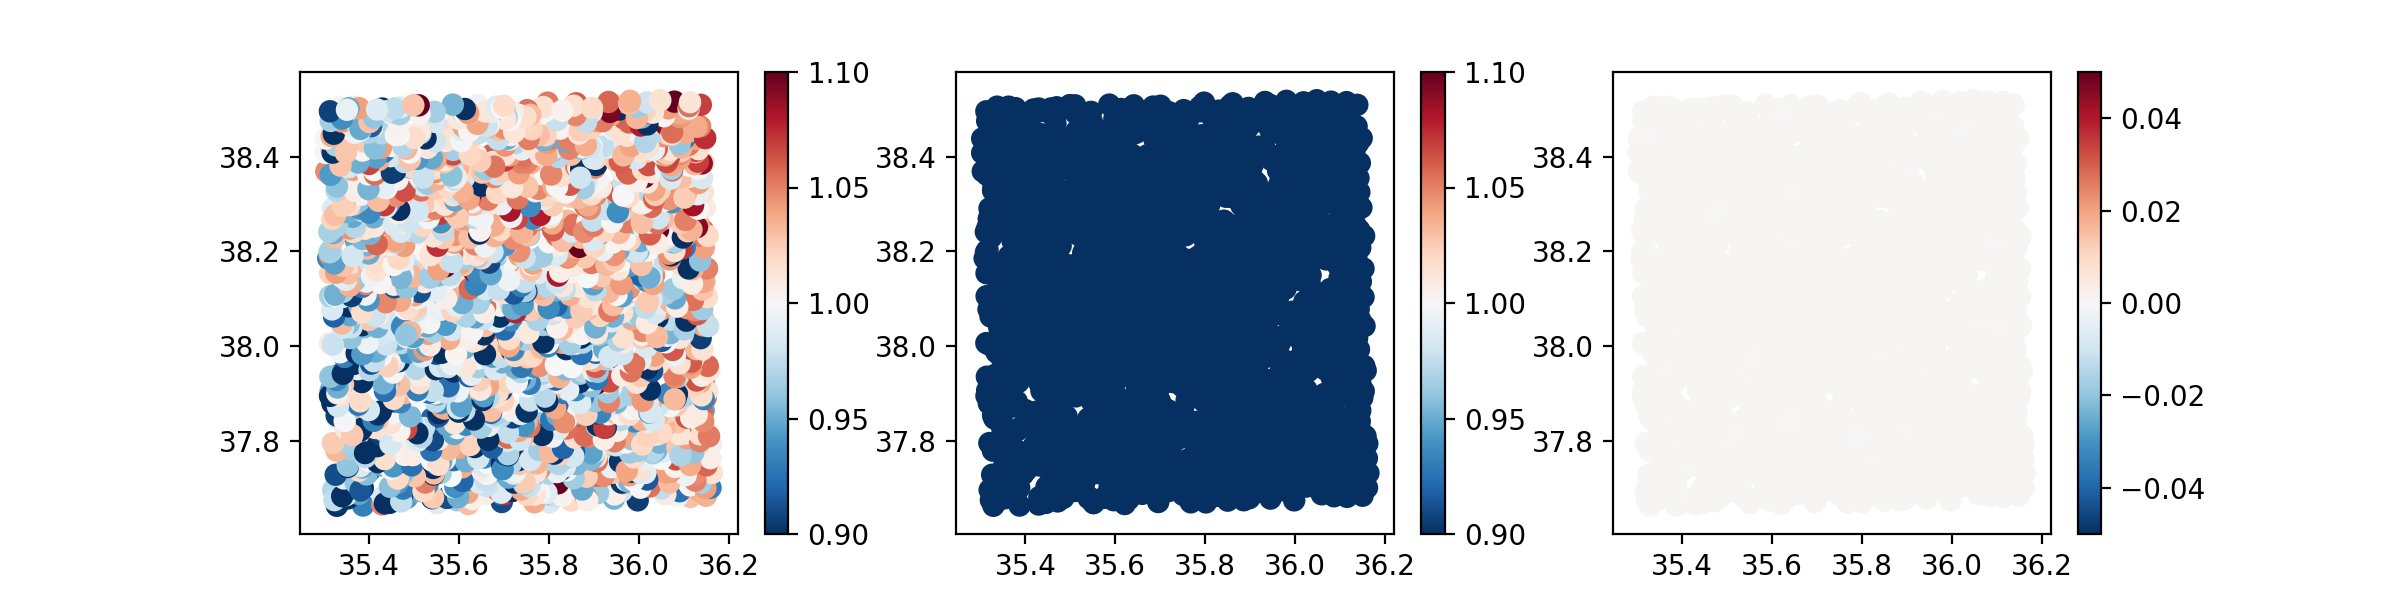

In [9]:
np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
cmap = 'RdBu_r'
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=50,vmin=-0.05,vmax=0.05,cmap=cmap)
fig.colorbar(s,ax=axes[2])


[0.   0.25 0.5  0.75 1.  ]


<IPython.core.display.Javascript object>


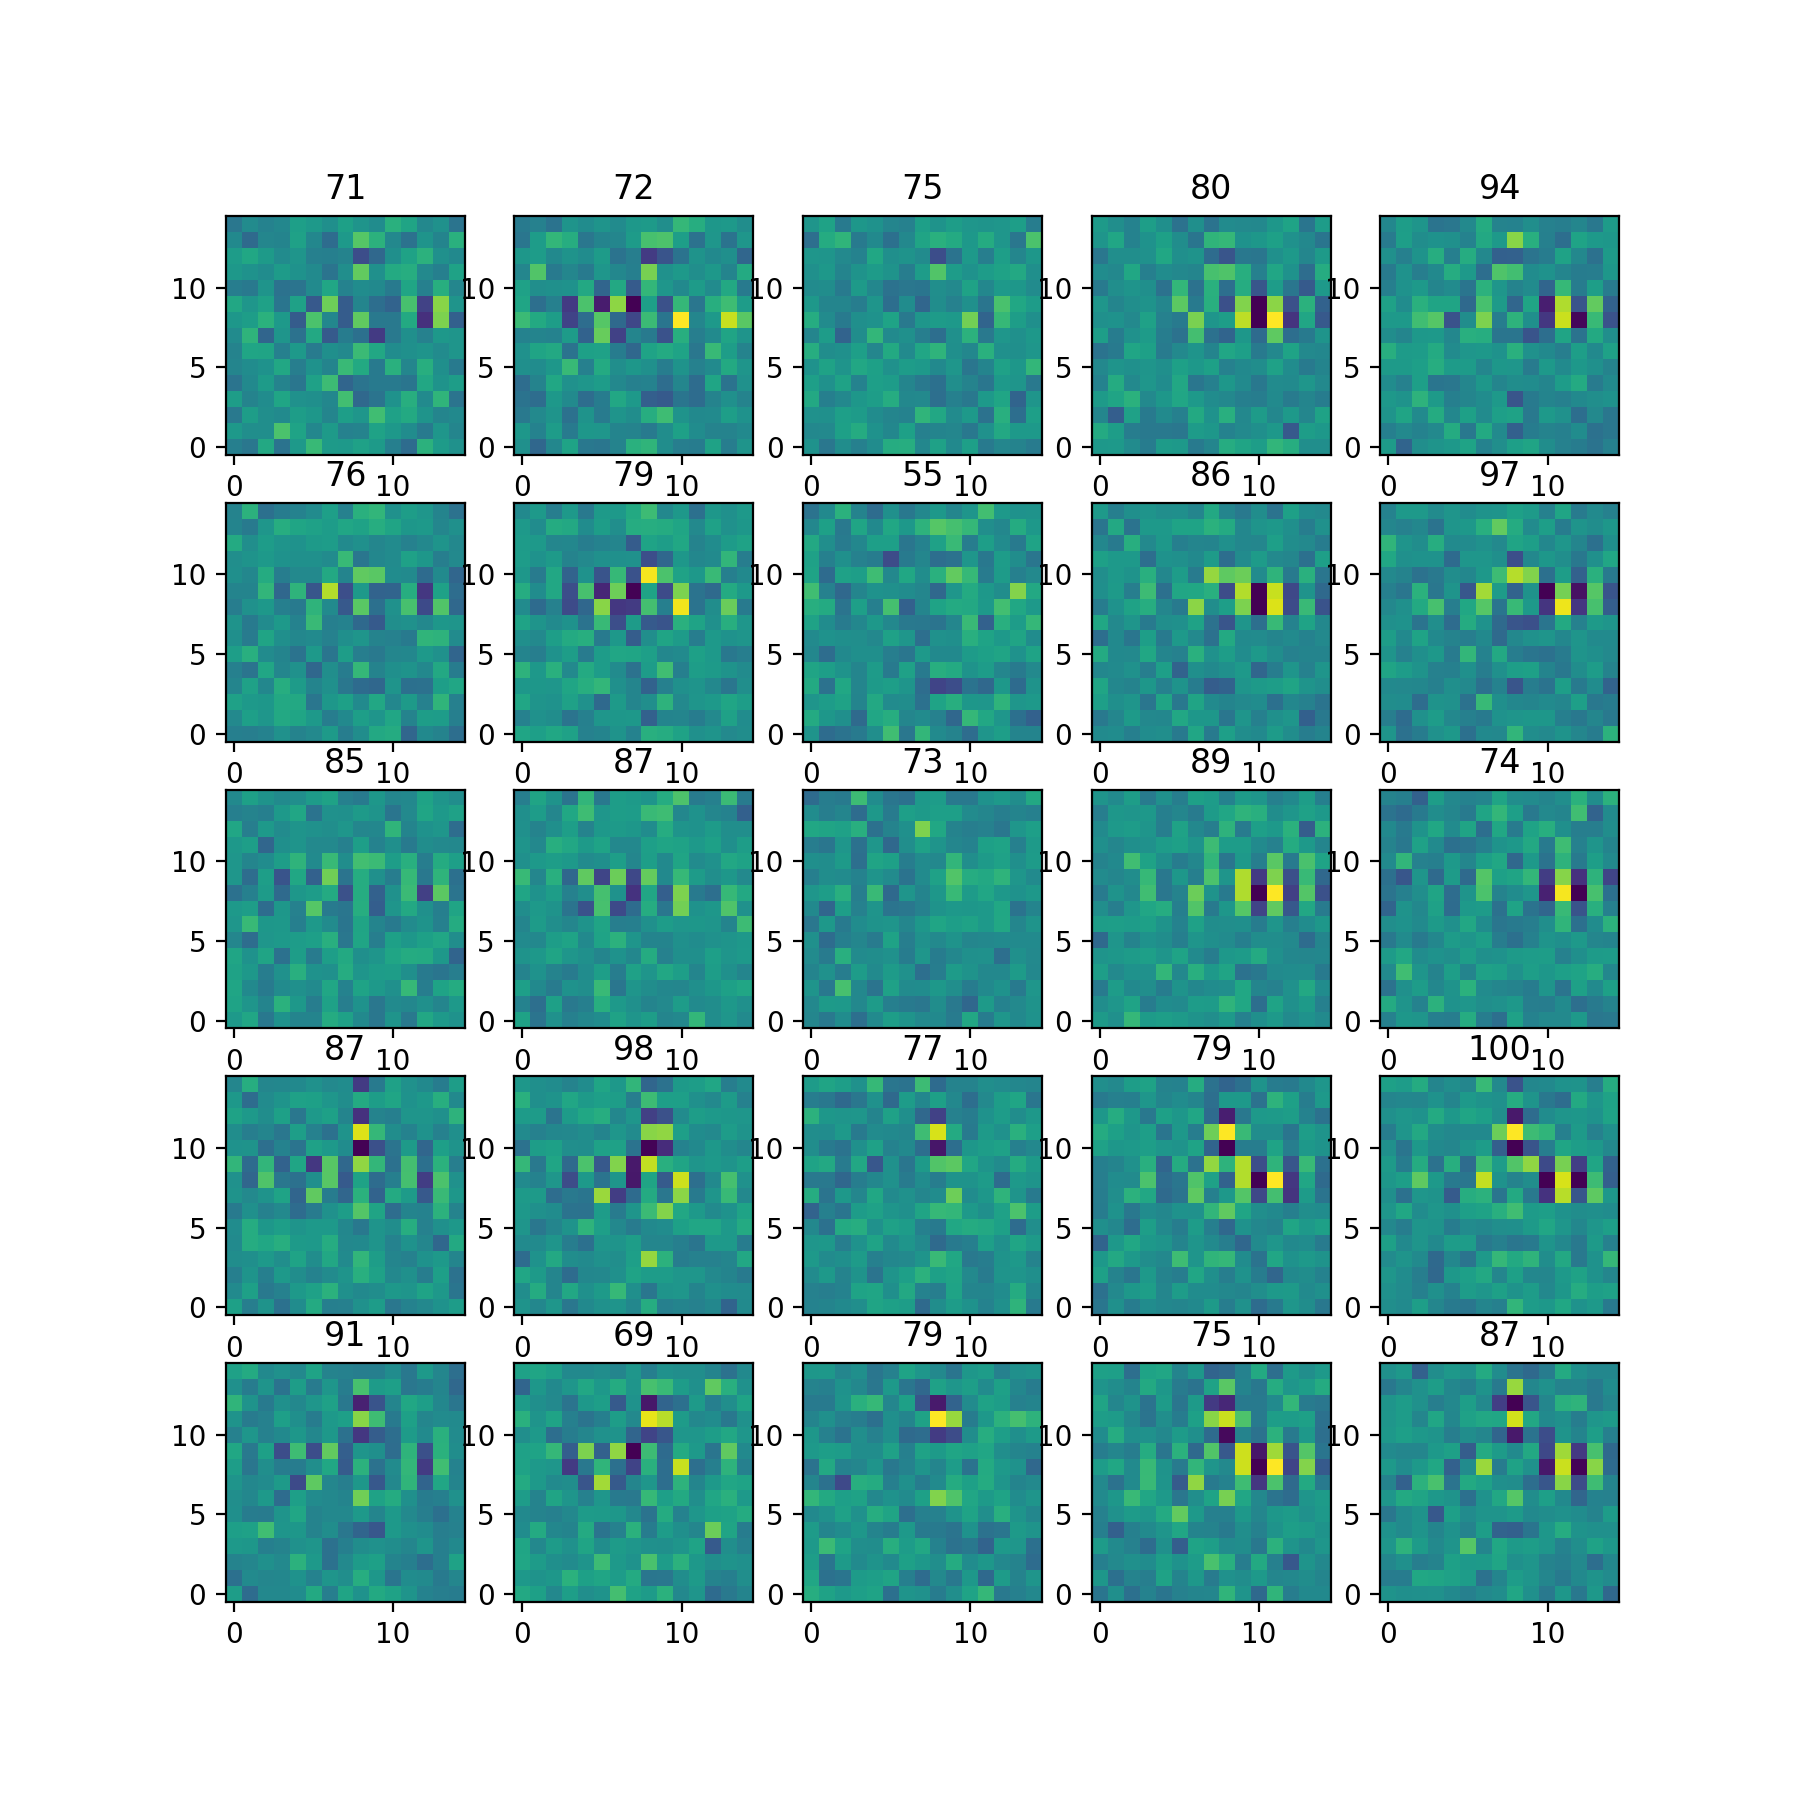

In [55]:
# BINNED BY POSITION

x = N.stack([float(s.x+0*s.center_to_offset(s.center)[0])%1 for s in new_stars])
y = N.stack([float(s.y+0*s.center_to_offset(s.center)[1])%1 for s in new_stars])


from scipy.stats import binned_statistic_2d
nbins = 5
bins = N.linspace(0.,1.,nbins)
print(bins)
hist = binned_statistic_2d(x = x, y = y, values = res.reshape((N.size(res,axis=0),-1)).T,bins=nbins,statistic='median',expand_binnumbers=True)
fig, axes = P.subplots(nbins,nbins,figsize=(9,9))
hr = hist[0].reshape((res.shape[1],res.shape[2],nbins,nbins))
for i in range(nbins):
    for j in range(nbins):
        axes[i,j].imshow(hr[...,i,j].T,vmin=-0.05,vmax=0.05,origin='lower')
        axes[i,j].set_title("{}".format(N.size(N.where((hist[-1][0]==i+1) * (hist[-1][1]==j+1)))))
        
        

[0.   0.25 0.5  0.75 1.  ]


<IPython.core.display.Javascript object>


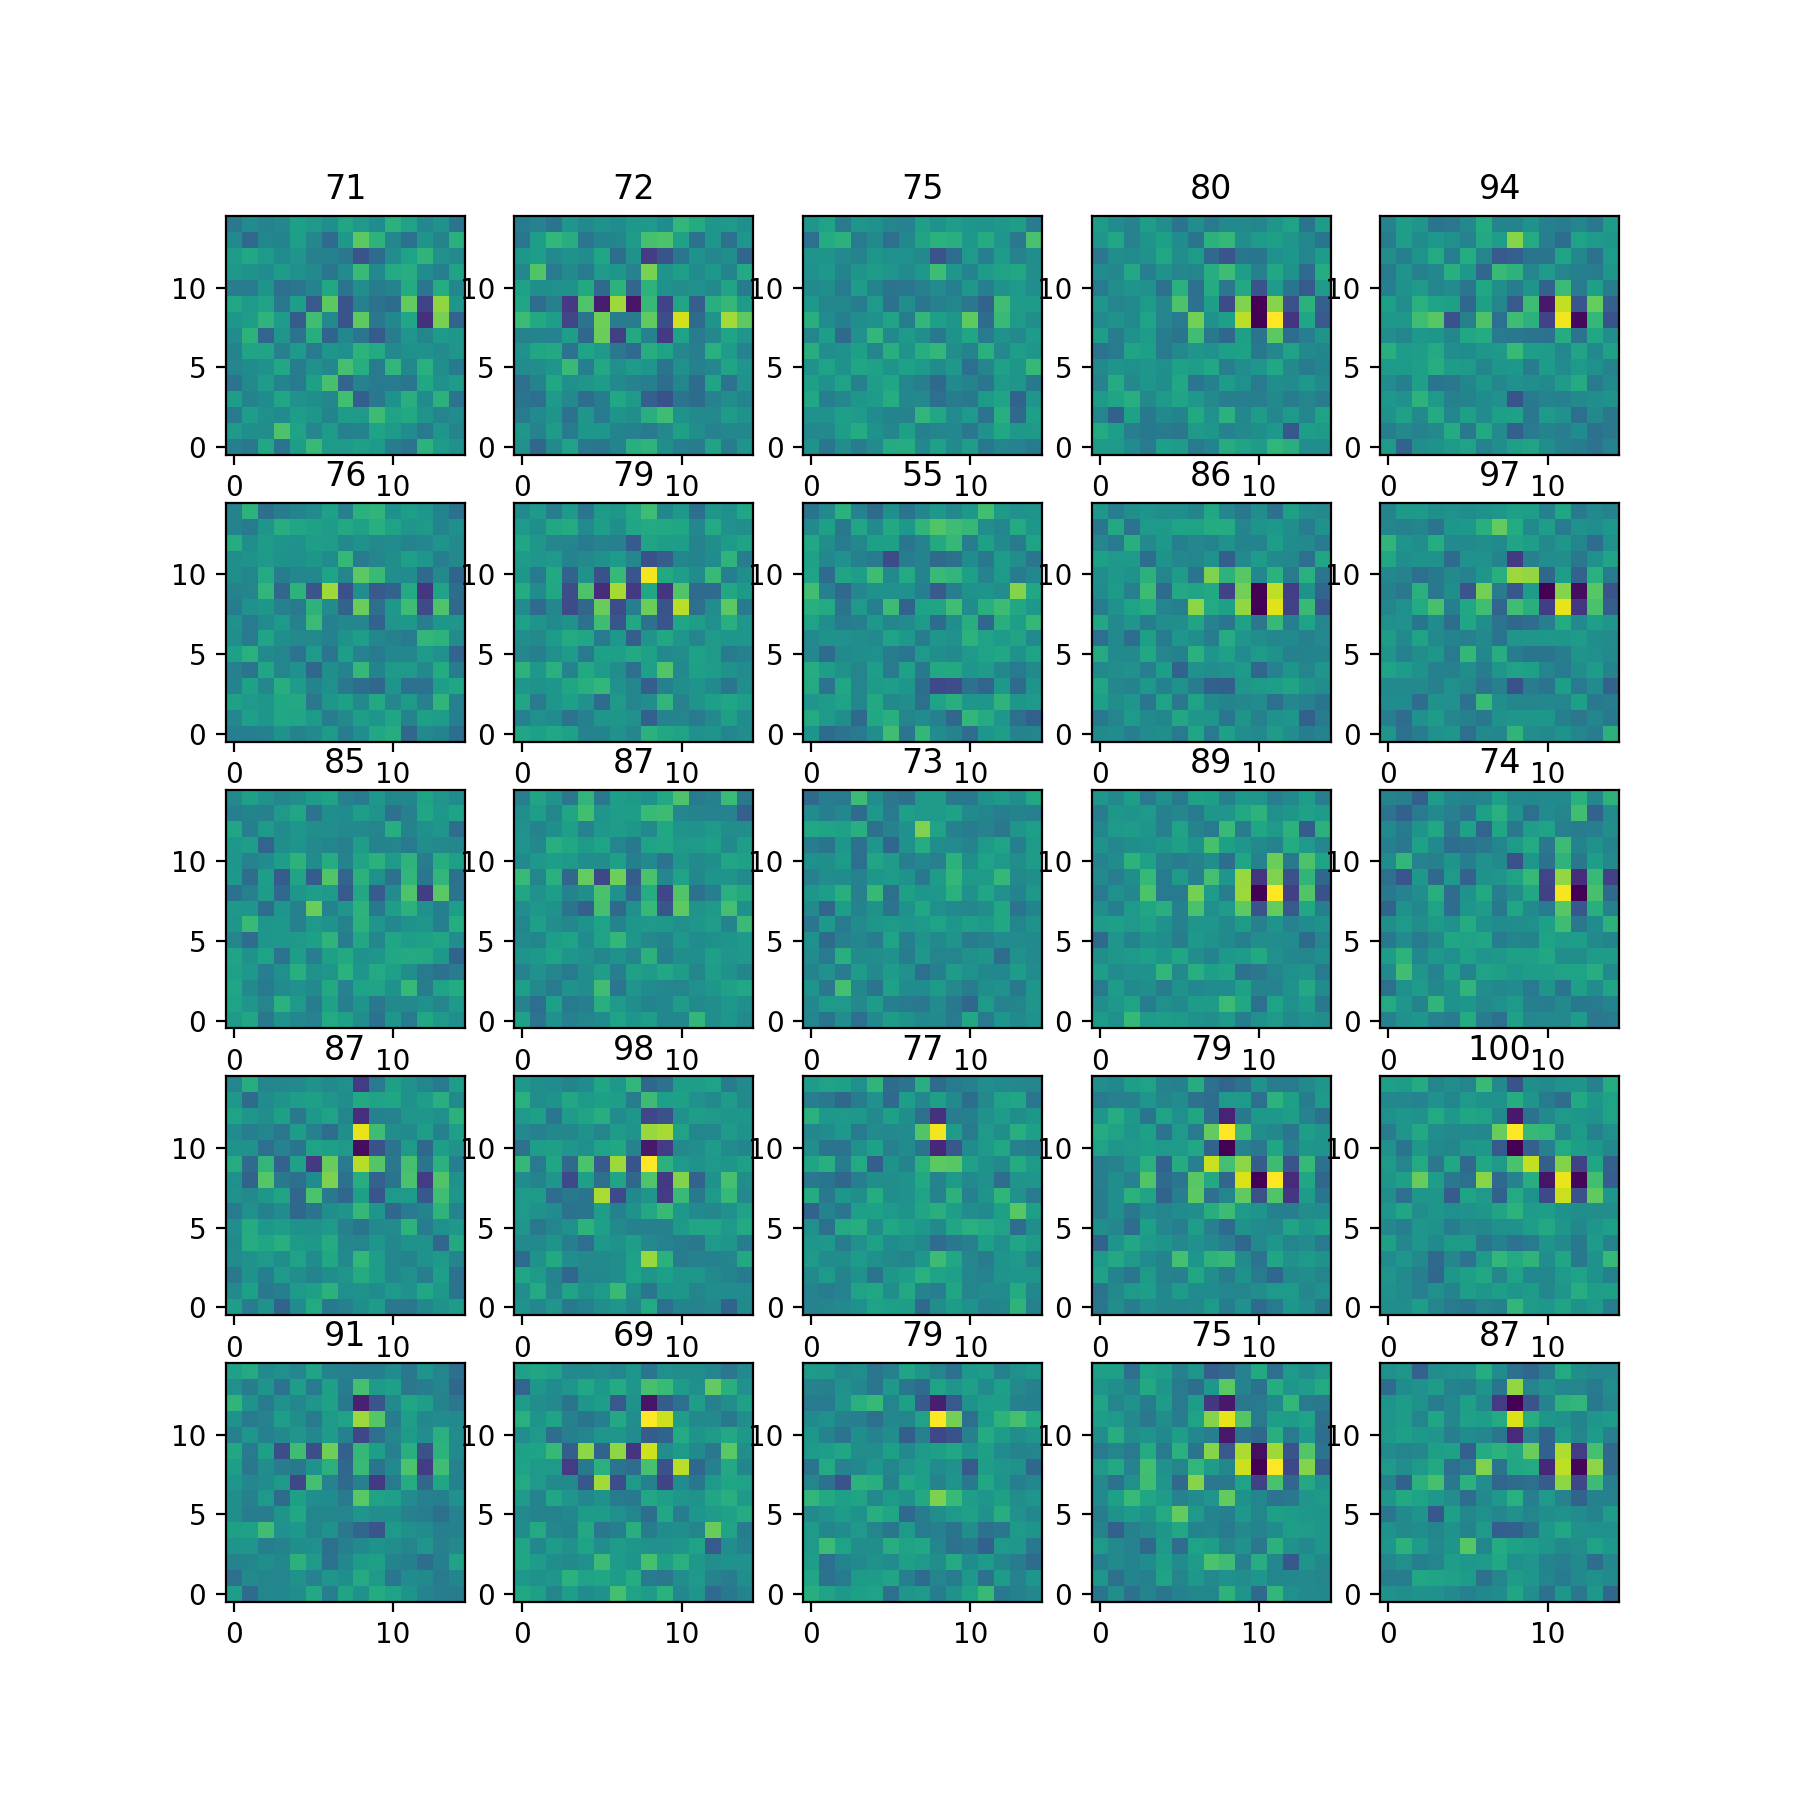

In [48]:
# BINNED BY POSITION

x = N.stack([float(s.x+0*s.center_to_offset(s.center)[0])%1 for s in new_stars])
y = N.stack([float(s.y+0*s.center_to_offset(s.center)[1])%1 for s in new_stars])


from scipy.stats import binned_statistic_2d
nbins = 5
bins = N.linspace(0.,1.,nbins)
print(bins)
hist = binned_statistic_2d(x = x, y = y, values = res.reshape((N.size(res,axis=0),-1)).T,bins=nbins,statistic='median',expand_binnumbers=True)

fig, axes = P.subplots(nbins,nbins,figsize=(9,9))
hr = hist[0].reshape((res.shape[1],res.shape[2],nbins,nbins))
for i in range(nbins):
    for j in range(nbins):
        axes[i,j].imshow(hr[...,i,j].T,vmin=-0.05,vmax=0.05,origin='lower')
        axes[i,j].set_title("{}".format(N.size(N.where((hist[-1][0]==i+1) * (hist[-1][1]==j+1)))))
        
        

# PER CCD

In [31]:
imgs = ['/Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q{}_sciimg.fits'.format(i+1) for i in range(4)]
z = ziff.ziff.Ziff(imgs,logger=logger,load_default_cat= True, build_default_cat = True)
z.set_config_value('i/o,nstars',100)
z.set_config_value('psf,interp,order',2)
z.run_piff('gaia_calibration',overwrite_cat=True)

Loading default catalogs


11:46:02 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:46:02 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
11:46:02 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
11:46:02 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
11:46:04 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:46:04 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
11:46:04 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg

In [32]:
z.set_config_value('i/o,nstars',10000)
stars = z.make_stars('gaia_full',overwrite_cat=True)
new_stars = z.reflux_stars(stars,fit_center=True, use_minuit=True)
res = z.compute_residuals(new_stars,normed=True,sky=200)
shapes = z.compute_shapes(new_stars)


11:47:00 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:47:00 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q2_sciimg.fits
11:47:00 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q3_sciimg.fits
11:47:01 WARNING:Using custom wcs from config for /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q4_sciimg.fits
11:47:01 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_sciimg.fits
11:47:01 WARNING:Reading star catalog /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_20190301483877_000579_zg_c07_o_q1_gaia_full.fits.
11:47:01 INFO:Processing catalog 0 with 468 stars
11:47:01 WARNING:Reading image file /Users/graziani/Data/ZTF/sci/2019/0301/483877/ztf_2019030148

Processing 1/2047
Processing 2/2047
Processing 3/2047
Processing 4/2047
Processing 5/2047
Processing 6/2047
Processing 7/2047
Processing 8/2047
Processing 9/2047
Processing 10/2047
Processing 11/2047
Processing 12/2047
Processing 13/2047
Processing 14/2047
Processing 15/2047
Processing 16/2047
Processing 17/2047
Processing 18/2047
Processing 19/2047
Processing 20/2047
Processing 21/2047
Processing 22/2047
Processing 23/2047
Processing 24/2047
Processing 25/2047
Processing 26/2047
Processing 27/2047
Processing 28/2047
Processing 29/2047
Processing 30/2047
Processing 31/2047
Processing 32/2047
Processing 33/2047
Processing 34/2047
Processing 35/2047
Processing 36/2047
Processing 37/2047
Processing 38/2047
Processing 39/2047
Processing 40/2047
Processing 41/2047
Processing 42/2047
Processing 43/2047
Processing 44/2047
Processing 45/2047
Processing 46/2047
Processing 47/2047
Processing 48/2047
Processing 49/2047
Processing 50/2047
Processing 51/2047
Processing 52/2047
Processing 53/2047
Pr

Processing 417/2047
Processing 418/2047
Processing 419/2047
Processing 420/2047
Processing 421/2047
Processing 422/2047
Processing 423/2047
Processing 424/2047
Processing 425/2047
Processing 426/2047
Processing 427/2047
Processing 428/2047
Processing 429/2047
Processing 430/2047
Processing 431/2047
Processing 432/2047
Processing 433/2047
Processing 434/2047
Processing 435/2047
Processing 436/2047
Processing 437/2047
Processing 438/2047
Processing 439/2047
Processing 440/2047
Processing 441/2047
Processing 442/2047
Processing 443/2047
Processing 444/2047
Processing 445/2047
Processing 446/2047
Processing 447/2047
Processing 448/2047
Processing 449/2047
Processing 450/2047
Processing 451/2047
Processing 452/2047
Processing 453/2047
Processing 454/2047
Processing 455/2047
Processing 456/2047
Processing 457/2047
Processing 458/2047
Processing 459/2047
Processing 460/2047
Processing 461/2047
Processing 462/2047
Processing 463/2047
Processing 464/2047
Processing 465/2047
Processing 466/2047


Processing 829/2047
Processing 830/2047
Processing 831/2047
Processing 832/2047
Processing 833/2047
Processing 834/2047
Processing 835/2047
Processing 836/2047
Processing 837/2047
Processing 838/2047
Processing 839/2047
Processing 840/2047
Processing 841/2047
Processing 842/2047
Processing 843/2047
Processing 844/2047
Processing 845/2047
Processing 846/2047
Processing 847/2047
Processing 848/2047
Processing 849/2047
Processing 850/2047
Processing 851/2047
Processing 852/2047
Processing 853/2047
Processing 854/2047
Processing 855/2047
Processing 856/2047
Processing 857/2047
Processing 858/2047
Processing 859/2047
Processing 860/2047
Processing 861/2047
Processing 862/2047
Processing 863/2047
Processing 864/2047
Processing 865/2047
Processing 866/2047
Processing 867/2047
Processing 868/2047
Processing 869/2047
Processing 870/2047
Processing 871/2047
Processing 872/2047
Processing 873/2047
Processing 874/2047
Processing 875/2047
Processing 876/2047
Processing 877/2047
Processing 878/2047


Processing 1228/2047
Processing 1229/2047
Processing 1230/2047
Processing 1231/2047
Processing 1232/2047
Processing 1233/2047
Processing 1234/2047
Processing 1235/2047
Processing 1236/2047
Processing 1237/2047
Processing 1238/2047
Processing 1239/2047
Processing 1240/2047
Processing 1241/2047
Processing 1242/2047
Processing 1243/2047
Processing 1244/2047
Processing 1245/2047
Processing 1246/2047
Processing 1247/2047
Processing 1248/2047
Processing 1249/2047
Processing 1250/2047
Processing 1251/2047
Processing 1252/2047
Processing 1253/2047
Processing 1254/2047
Processing 1255/2047
Processing 1256/2047
Processing 1257/2047
Processing 1258/2047
Processing 1259/2047
Processing 1260/2047
Processing 1261/2047
Processing 1262/2047
Processing 1263/2047
Processing 1264/2047
Processing 1265/2047
Processing 1266/2047
Processing 1267/2047
Processing 1268/2047
Processing 1269/2047
Processing 1270/2047
Processing 1271/2047
Processing 1272/2047
Processing 1273/2047
Processing 1274/2047
Processing 12

Processing 1621/2047
Processing 1622/2047
Processing 1623/2047
Processing 1624/2047
Processing 1625/2047
Processing 1626/2047
Processing 1627/2047
Processing 1628/2047
Processing 1629/2047
Processing 1630/2047
Processing 1631/2047
Processing 1632/2047
Processing 1633/2047
Processing 1634/2047
Processing 1635/2047
Processing 1636/2047
Processing 1637/2047
Processing 1638/2047
Processing 1639/2047
Processing 1640/2047
Processing 1641/2047
Processing 1642/2047
Processing 1643/2047
Processing 1644/2047
Processing 1645/2047
Processing 1646/2047
Processing 1647/2047
Processing 1648/2047
Processing 1649/2047
Processing 1650/2047
Processing 1651/2047
Processing 1652/2047
Processing 1653/2047
Processing 1654/2047
Processing 1655/2047
Processing 1656/2047
Processing 1657/2047
Processing 1658/2047
Processing 1659/2047
Processing 1660/2047
Processing 1661/2047
Processing 1662/2047
Processing 1663/2047
Processing 1664/2047
Processing 1665/2047
Processing 1666/2047
Processing 1667/2047
Processing 16

Processing 2014/2047
Processing 2015/2047
Processing 2016/2047
Processing 2017/2047
Processing 2018/2047
Processing 2019/2047
Processing 2020/2047
Processing 2021/2047
Processing 2022/2047
Processing 2023/2047
Processing 2024/2047
Processing 2025/2047
Processing 2026/2047
Processing 2027/2047
Processing 2028/2047
Processing 2029/2047
Processing 2030/2047
Processing 2031/2047
Processing 2032/2047
Processing 2033/2047
Processing 2034/2047
Processing 2035/2047
Processing 2036/2047
Processing 2037/2047
Processing 2038/2047
Processing 2039/2047
Processing 2040/2047
Processing 2041/2047
Processing 2042/2047
Processing 2043/2047
Processing 2044/2047
Processing 2045/2047
Processing 2046/2047
Processing 2047/2047


<IPython.core.display.Javascript object>


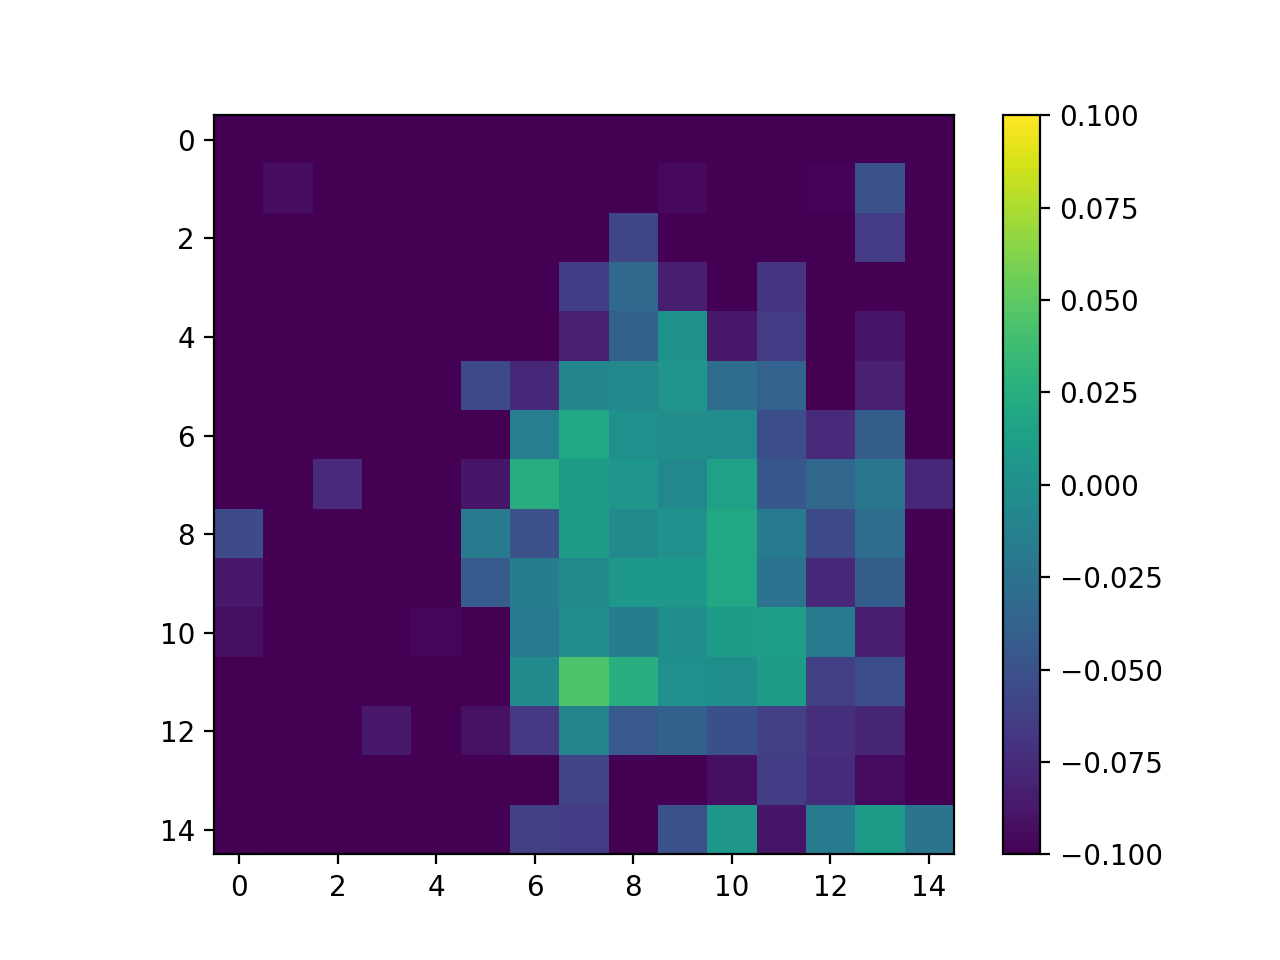

<IPython.core.display.Javascript object>


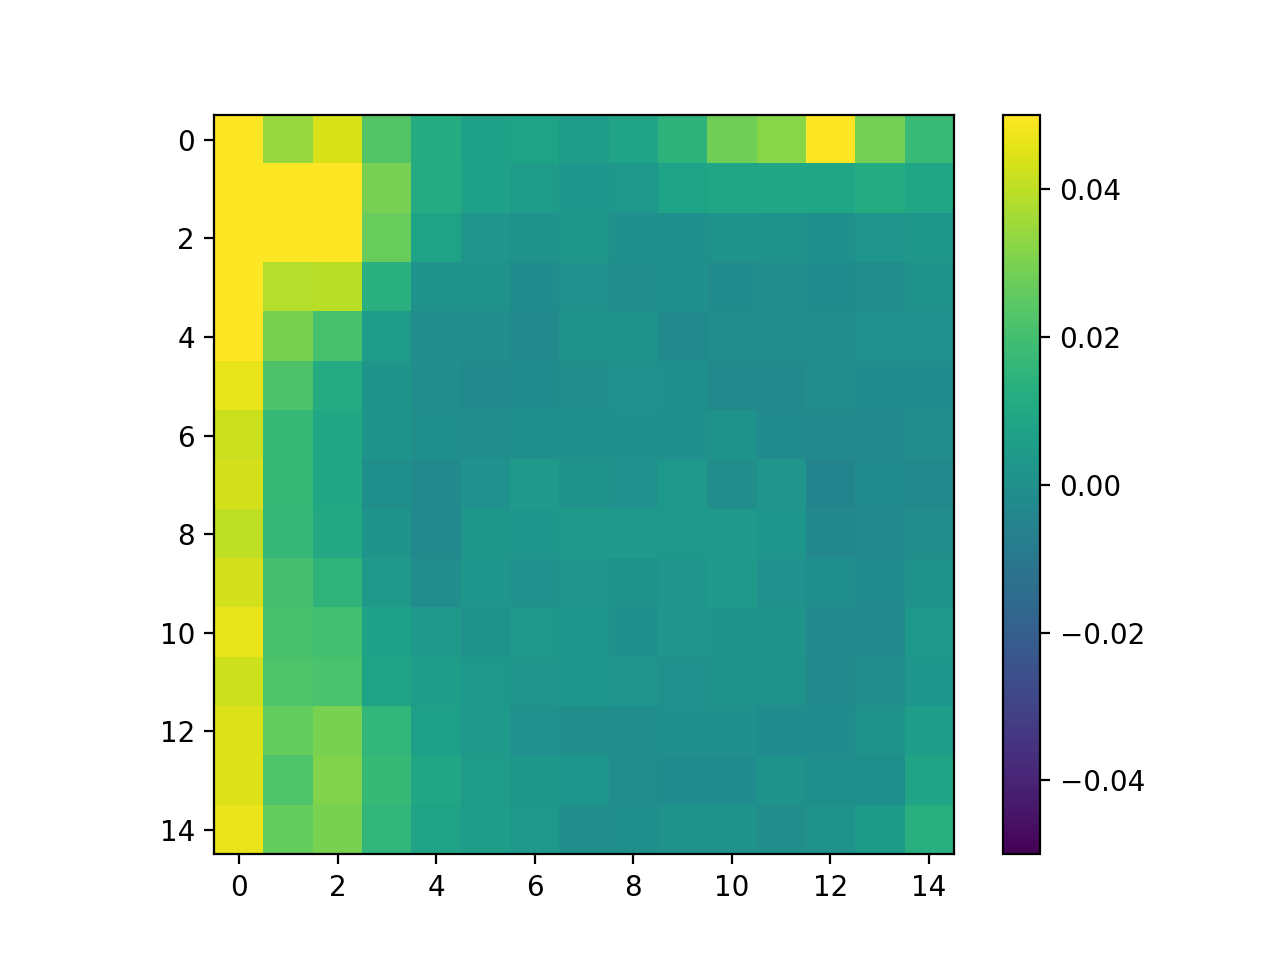

<IPython.core.display.Javascript object>


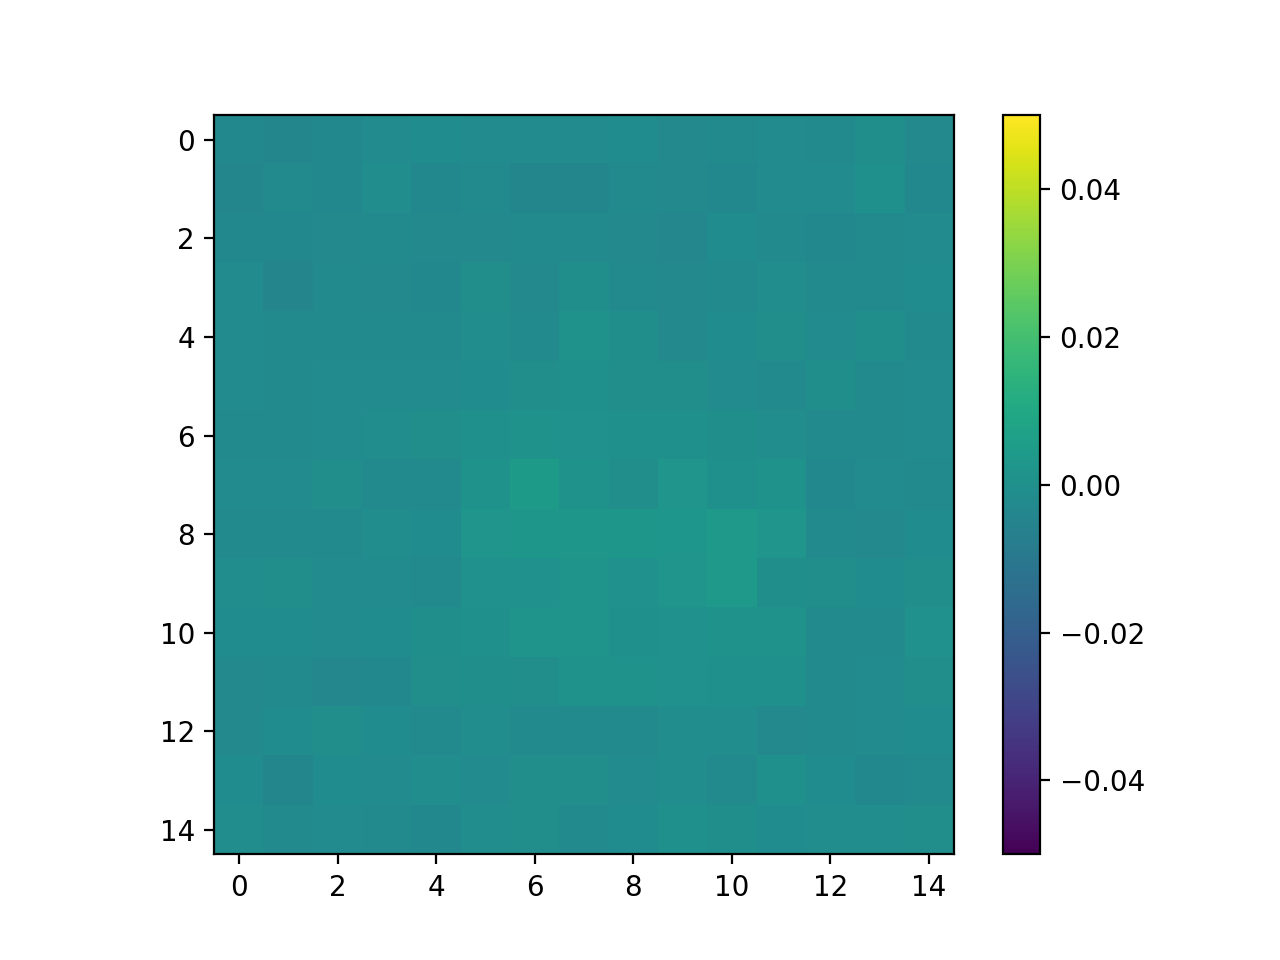

In [33]:
%matplotlib notebook
fig, ax = P.subplots()
i = ax.imshow(res[10],vmin=-0.1,vmax=0.1)
P.colorbar(i)

fig, ax = P.subplots()
i = ax.imshow(N.mean(res,axis=0),vmin=-0.05,vmax=0.05)
P.colorbar(i)

fig, ax = P.subplots()
i = ax.imshow(N.median(res,axis=0),vmin=-0.05,vmax=0.05)
P.colorbar(i)

<IPython.core.display.Javascript object>


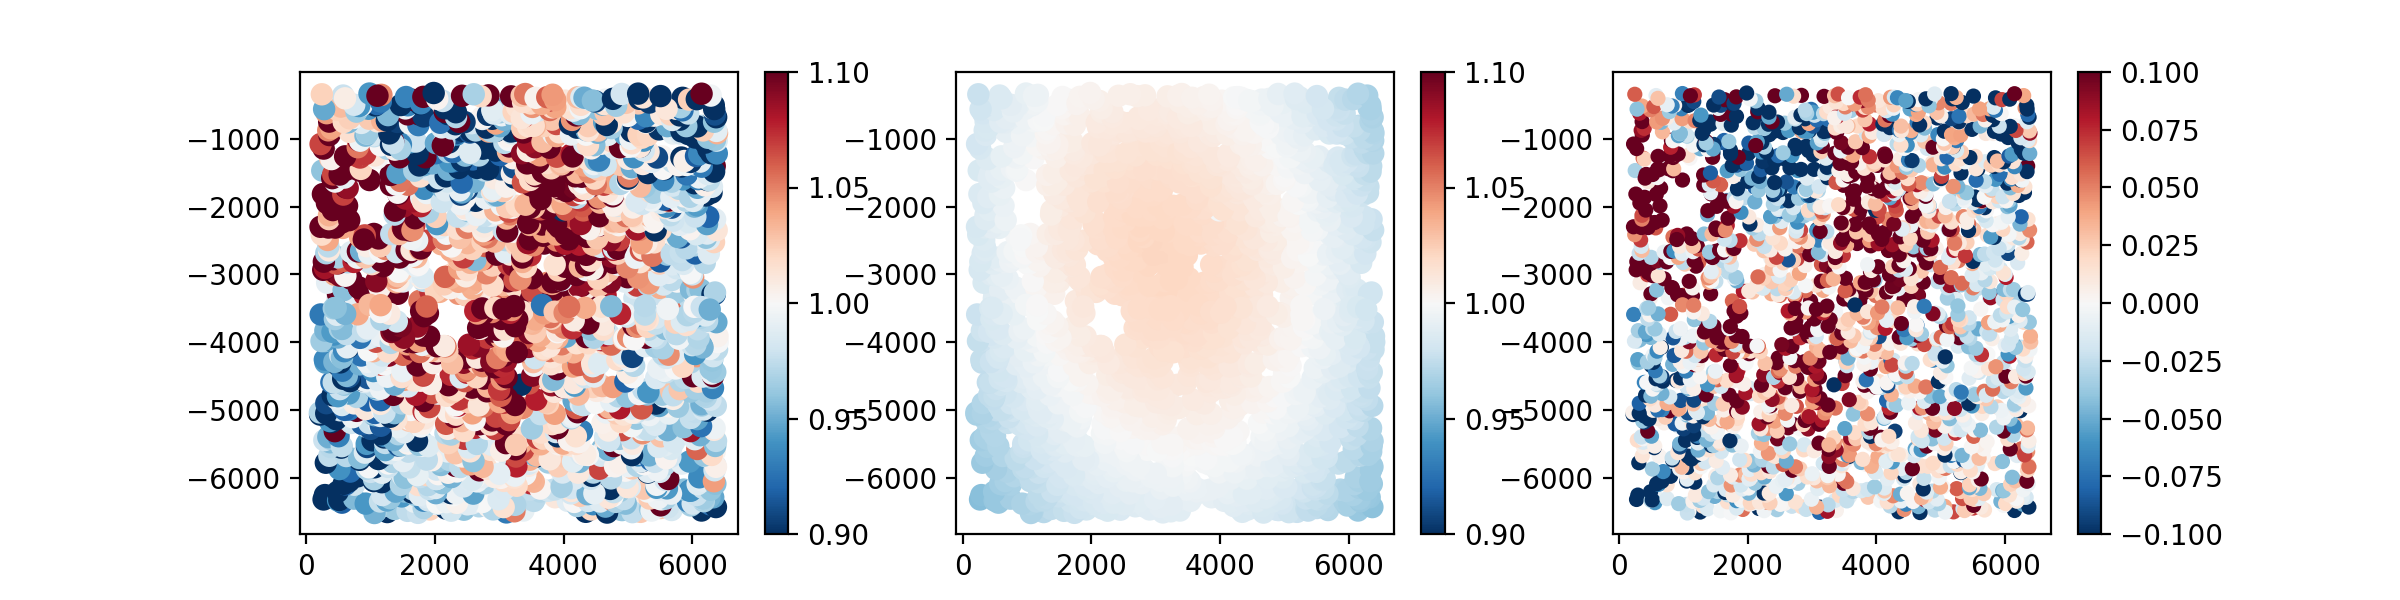

In [36]:
np = N
fig, axes = P.subplots(1,3,figsize=(12,3))
cmap = 'RdBu_r'
s = axes[0].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[0])
s = axes[1].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_model_normalized']),s=50,vmin=0.9,vmax=1.1,cmap=cmap)
fig.colorbar(s,ax=axes[1])

s = axes[2].scatter(shapes['u'],shapes['v'],c=np.asarray(shapes['T_data'])-np.asarray(shapes['T_model']),s=20,vmin=-0.1,vmax=0.1,cmap=cmap)
fig.colorbar(s,ax=axes[2])


In [3]:

DOWNLOAD = False
from ztfquery import query
zquery = query.ZTFQuery() 
zquery.load_metadata(sql_query = "ccdid=4 and fid=1 and obsjd BETWEEN 2458543.9 AND 2458544")
#zquery.load_metadata(sql_query = "qid=1 and fid=1 and filefracday=20190301480845")


In [5]:
z = ziff.ziff.ZiffCollection.from_zquery(zquery,['ccdid','filefracday'],build_default_cat = False, load_default_cat = False)


In [30]:
with open('testing.txt','w') as f:
    for ziff in z.ziffs:
        for (i,l0) in enumerate(ziff._sciimg):
            if i ==0 :
                f.write(l0)
            else:
                f.write(',' + l0)
        f.write('\n')

In [42]:
df = pd.read_csv('testing.txt',header=0,index_col=False,names=(0,1,2,3))
df.loc[0].values

array(['/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q4_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q2_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q3_sciimg.fits',
       '/Users/graziani/Data/ZTF/sci/2019/0301/481516/ztf_20190301481516_000530_zg_c04_o_q1_sciimg.fits'],
      dtype=object)

In [55]:
import ziff.ziff
z = ziff.ziff.Ziff.from_file('testing.txt',row=10,build_default_cat = False, load_default_cat = False)

In [56]:
print(z._mskimg)

['/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q3_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q1_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q2_mskimg.fits', '/Users/graziani/Data/ZTF/sci/2019/0301/486863/ztf_20190301486863_000791_zg_c04_o_q4_mskimg.fits']


In [57]:
ziff.ziff.__file__

'/Users/graziani/anaconda3/lib/python3.6/site-packages/ziff/ziff.py'

In [76]:
N.savez('test',**shapes)

In [77]:
N.load('test.npz')['T_data']

array([ 1.24689474,  1.28897674,  1.33036922,  1.15706957,  1.27659047,
        1.23634347,  1.29384166,  1.2623528 ,  1.29854489,  1.26509485,
        1.48650652,  1.26060563,  1.2546114 ,  1.25916529,  1.26858063,
        1.24489173,  1.34950832,  1.34775241,  1.26590312,  1.34718136,
        1.29814057,  1.4187598 ,  1.29940599,  1.26479864,  1.40830134,
        1.29281637,  1.28189434,  1.37495187,  1.29647367,  1.36383777,
        1.36410562,  1.28060225,  1.30552582,  1.34998007,  1.28136827,
        1.26454363,  1.32848814,  1.28561584,  1.32554889,  1.26284819,
        1.31255873,  1.47334248,  1.30119099,  1.29643341,  1.24746761,
        1.26246308,  1.30248621,  1.35915487,  1.31469694,  1.28296201,
        1.38553476,  1.30207118,  1.36816999,  1.30223016,  1.3102232 ,
        1.34768858,  1.3072745 ,  1.27212055,  1.31784218,  1.28671955,
        1.36973769,  1.32589669,  1.3238842 ,  1.46934772,  1.2709907 ,
        1.30728382,  1.22037106,  0.95600982,  1.31696824,  1.27